# Experimento 3 - Comparação com ReAct com Prompt Enriquecido (Narrativa Descritiva)

**Objetivo**: Avaliar se a separação explícita da etapa de personalização, proposta no \textit{PersonaReAct}, resulta em respostas mais organizadas, concisas e claras do que a personalização direta por prompt no ReAct tradicional.

**Metodologia**
* Escolher 4 perfis diferentes
* Escolher 1 pergunta para todos os perfis
  * "Quais jogadores aceleraram o ritmo do jogo contra o Ceará, no dia 1 de abril de 2023, com suas arrancadas e dribles?"
  * Para cada perfil, responder a pergunta com o ReAct com Prompt Enriquecido e com o PersonaReAct
* Submeter o par de respostas (com ReAct com Prompt Enriquecido e com o PersonaReAct) à LLM avaliadora.

Critérios de avaliação da LLM:
* Vocabulário Específico Ao Perfil,
* Foco Informacional Adaptado,
* Organizacao Textual Por Perfil,
* Adaptacao Explícita De Linguagem,
* Coerencia Perfil Resposta,
* Sinais Claros De Personalizacao,

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.

# Importação de bibliotecas

In [59]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Importação dos Resultados

O arquivo de resultados é composto pelas pontuações (scores) geradas pelo G-Eval para cada um dos 7 critérios elaborados.

A pergunta foi feita utilizando o padrão ReAct e o padrão PersonaReAct para cada perfil listado abaixo.

Cada pontuação foi calculada 20 vezes e os seus resultados salvos nas listas ```scores_personareact``` e ```scores_react_prompt```.

# Pergunta Narrativa Descritiva

## Torcedor

Pergunta: "Qual jogador mais se destacou em termos de distância percorrida e velocidade média no jogo contra o Ceará no dia 1º de abril de 2023?"


In [60]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_torcedor_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.65,9.65,0.00
1,Quais jogadores aceleraram o ritmo do jogo con...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.65,9.68,-0.03
2,Quais jogadores aceleraram o ritmo do jogo con...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.59,9.71,-0.12
3,Quais jogadores aceleraram o ritmo do jogo con...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.68,9.71,-0.03
4,Quais jogadores aceleraram o ritmo do jogo con...,Torcedor do Time,VocabulárioEspecíficoAoPerfil,9.56,9.71,-0.15


In [61]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.62,0.03,9.37,0.06
1,CoerenciaPerfilResposta,9.14,0.03,8.86,0.03
2,FocoInformacionalAdaptado,9.07,0.06,9.20,0.12
3,OrganizacaoTextualPorPerfil,9.49,0.11,9.32,0.05
4,SinaisClarosDePersonalizacao,8.93,0.08,8.70,0.05
5,VocabulárioEspecíficoAoPerfil,9.63,0.05,9.69,0.04


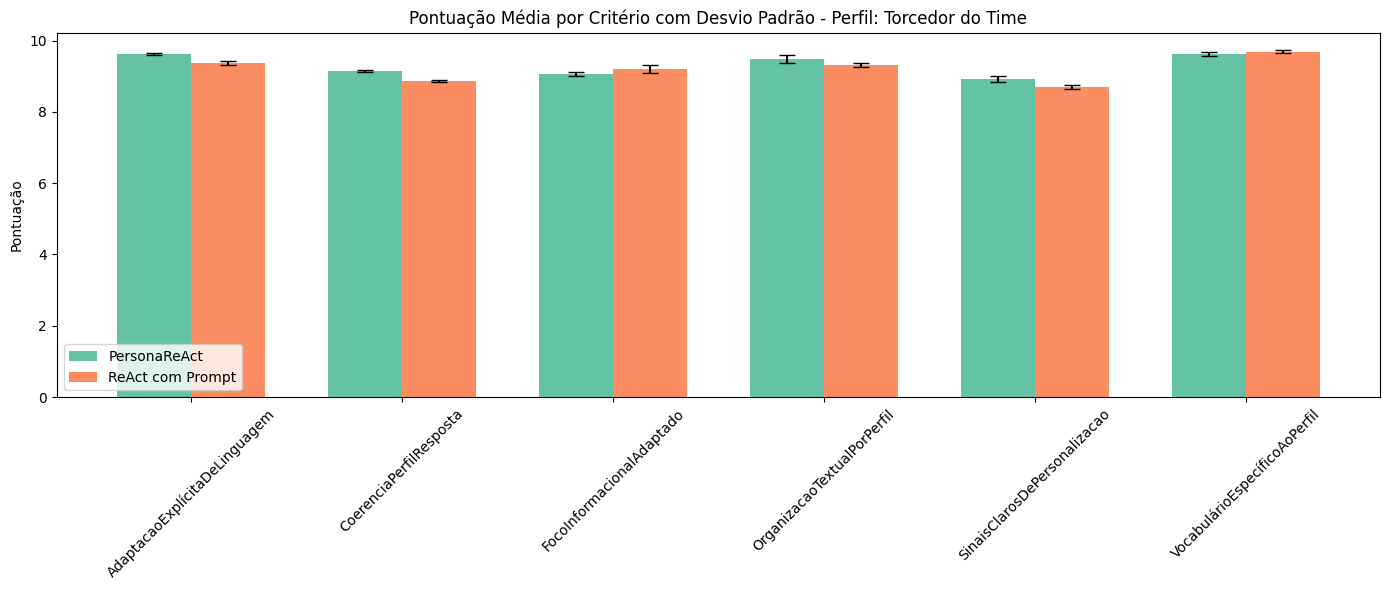

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Torcedor do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [63]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.63,9.69,1.819810e-05,✅
1,FocoInformacionalAdaptado,9.07,9.20,4.126541e-04,✅
2,OrganizacaoTextualPorPerfil,9.49,9.32,1.647384e-05,✅
3,AdaptacaoExplícitaDeLinguagem,9.62,9.37,6.757293e-13,✅
4,CoerenciaPerfilResposta,9.14,8.86,1.099082e-17,✅
5,SinaisClarosDePersonalizacao,8.93,8.70,2.168150e-10,✅


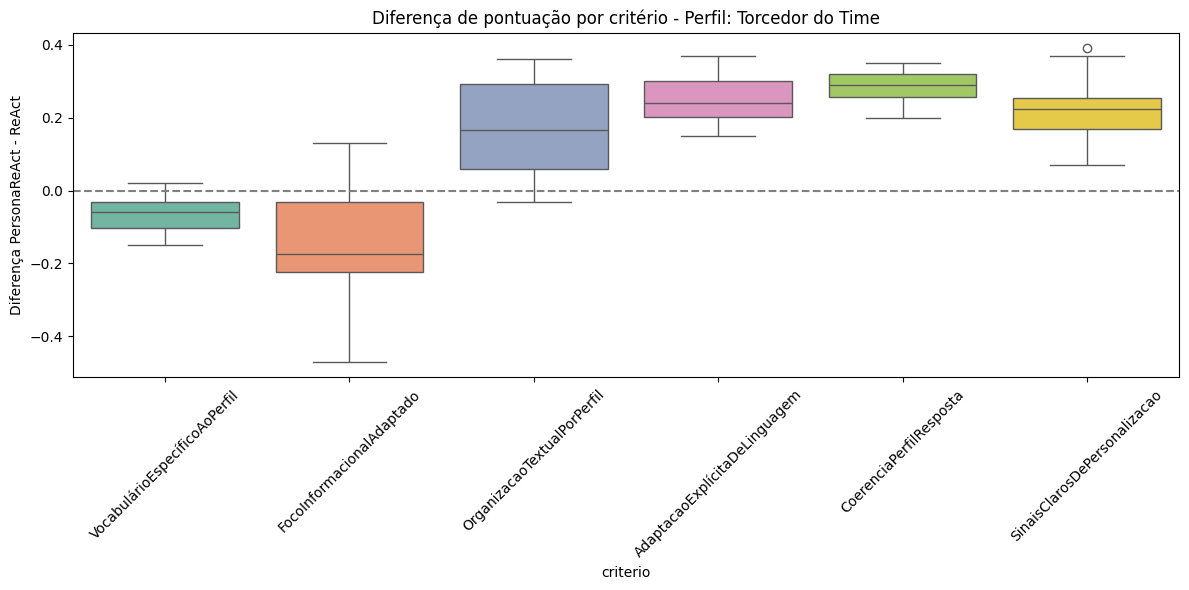

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Torcedor do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

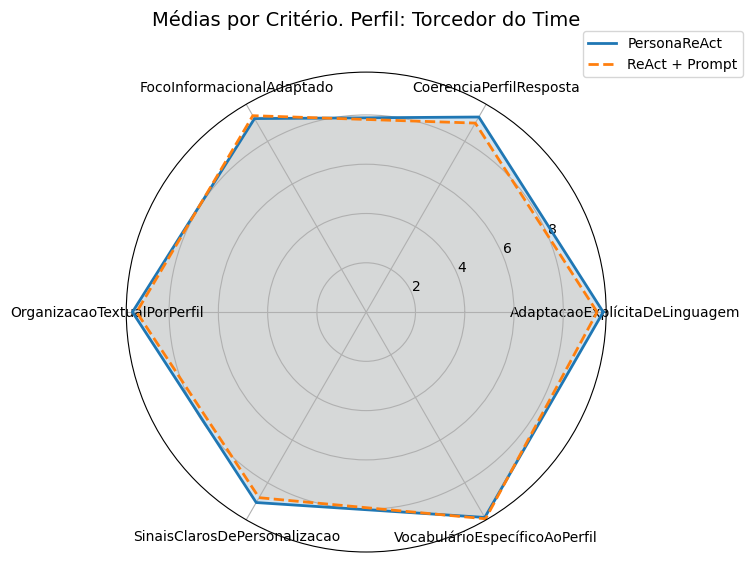

In [65]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Torcedor do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Técnico

In [66]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_tecnico_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.32,9.06,0.26
1,Quais jogadores aceleraram o ritmo do jogo con...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.13,8.98,0.15
2,Quais jogadores aceleraram o ritmo do jogo con...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.17,8.99,0.18
3,Quais jogadores aceleraram o ritmo do jogo con...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.22,9.08,0.14
4,Quais jogadores aceleraram o ritmo do jogo con...,Técnico do Time,VocabulárioEspecíficoAoPerfil,9.13,8.97,0.16


In [67]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.29,0.05,9.42,0.06
1,CoerenciaPerfilResposta,9.84,0.03,9.78,0.03
2,FocoInformacionalAdaptado,9.41,0.05,9.17,0.07
3,OrganizacaoTextualPorPerfil,9.23,0.06,8.88,0.03
4,SinaisClarosDePersonalizacao,4.95,0.11,5.92,0.23
5,VocabulárioEspecíficoAoPerfil,9.11,0.09,9.01,0.08


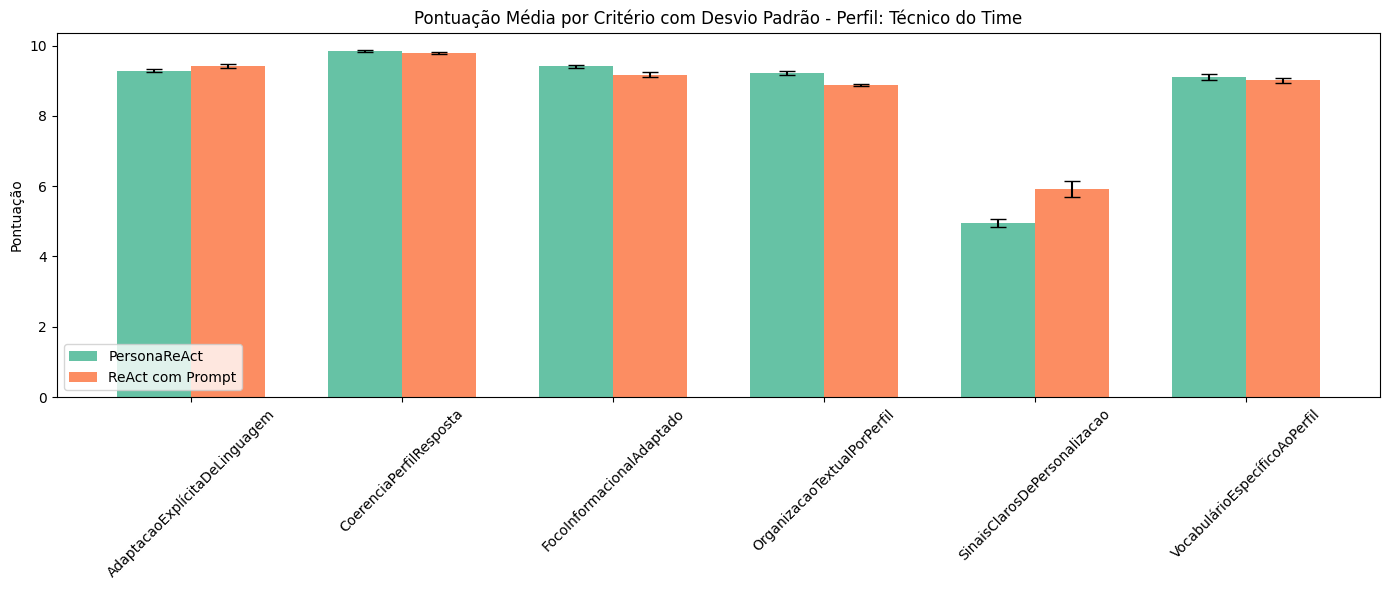

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Técnico do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [69]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.11,9.01,1.043157e-06,✅
1,FocoInformacionalAdaptado,9.41,9.17,4.461331e-10,✅
2,OrganizacaoTextualPorPerfil,9.23,8.88,8.065643e-16,✅
3,AdaptacaoExplícitaDeLinguagem,9.29,9.42,2.856892e-08,✅
4,CoerenciaPerfilResposta,9.84,9.78,2.651078e-07,✅
5,SinaisClarosDePersonalizacao,4.95,5.92,2.671386e-12,✅


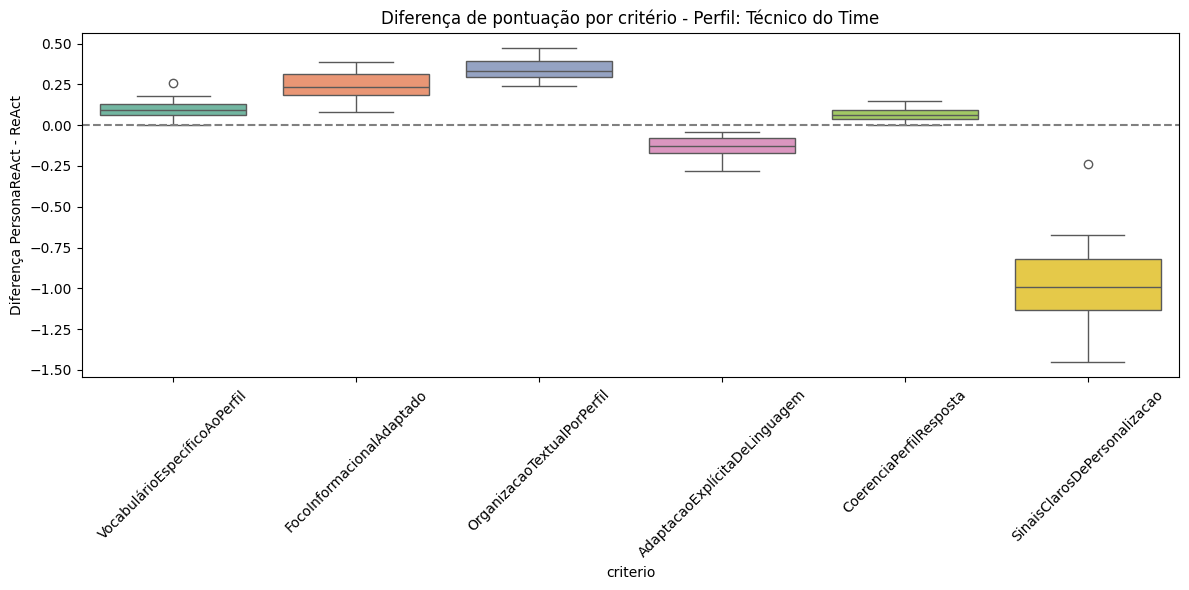

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Técnico do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

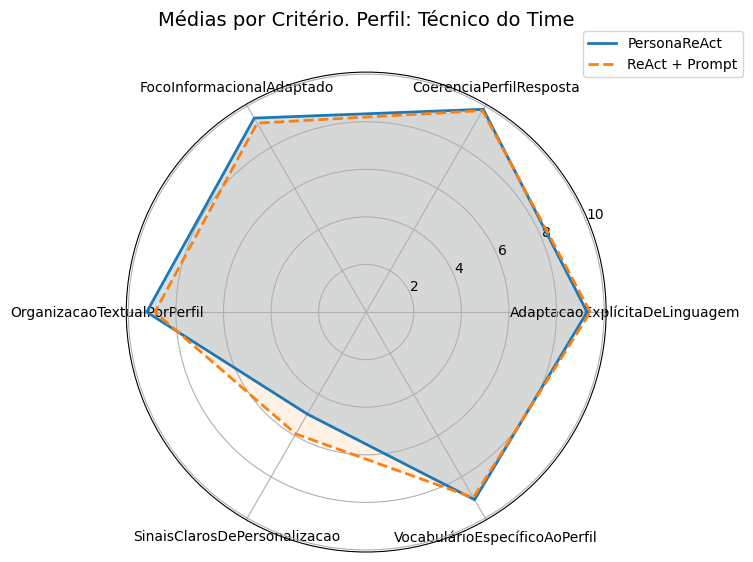

In [71]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Técnico do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Reporter Esportivo

In [72]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_reporter_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.20,9.01,0.19
1,Quais jogadores aceleraram o ritmo do jogo con...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.27,9.00,0.27
2,Quais jogadores aceleraram o ritmo do jogo con...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.23,8.94,0.29
3,Quais jogadores aceleraram o ritmo do jogo con...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.25,8.98,0.27
4,Quais jogadores aceleraram o ritmo do jogo con...,Reporter Esportivo,VocabulárioEspecíficoAoPerfil,9.25,8.98,0.27


In [73]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.77,0.04,9.25,0.08
1,CoerenciaPerfilResposta,9.90,0.03,9.30,0.03
2,FocoInformacionalAdaptado,9.86,0.02,9.57,0.05
3,OrganizacaoTextualPorPerfil,9.48,0.08,9.11,0.04
4,SinaisClarosDePersonalizacao,9.44,0.08,9.01,0.07
5,VocabulárioEspecíficoAoPerfil,9.27,0.04,8.97,0.02


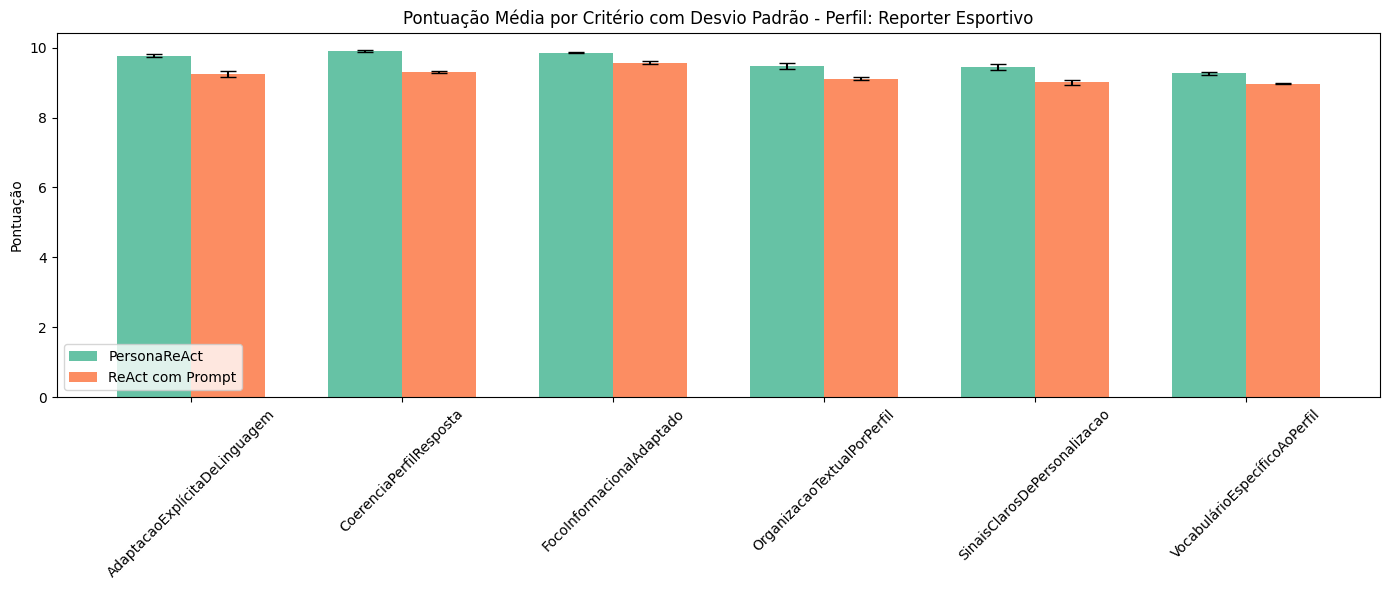

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Reporter Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [75]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.27,8.97,8.928748e-17,✅
1,FocoInformacionalAdaptado,9.86,9.57,1.925247e-15,✅
2,OrganizacaoTextualPorPerfil,9.48,9.11,2.970938e-13,✅
3,AdaptacaoExplícitaDeLinguagem,9.77,9.25,2.557225e-16,✅
4,CoerenciaPerfilResposta,9.90,9.30,6.069247e-22,✅
5,SinaisClarosDePersonalizacao,9.44,9.01,3.305059e-12,✅


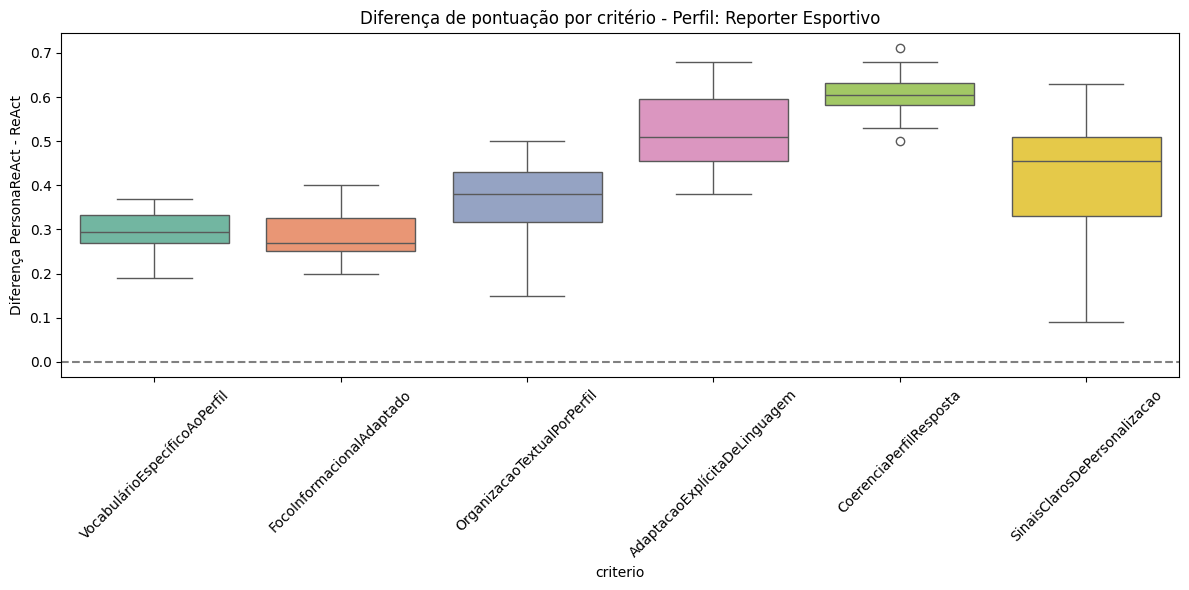

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Reporter Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

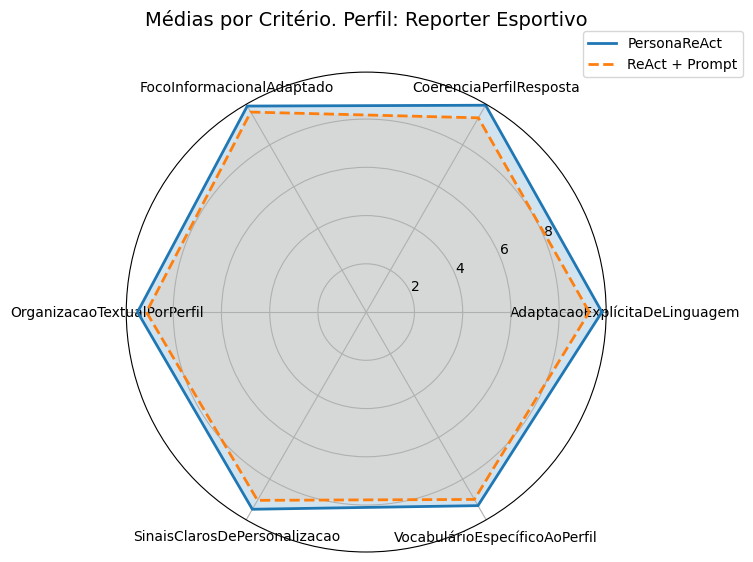

In [77]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Reporter Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

## Preparador Físico

In [78]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_preparador_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.44,9.59,-0.15
1,Quais jogadores aceleraram o ritmo do jogo con...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.44,9.62,-0.18
2,Quais jogadores aceleraram o ritmo do jogo con...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.41,9.78,-0.37
3,Quais jogadores aceleraram o ritmo do jogo con...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.38,9.62,-0.24
4,Quais jogadores aceleraram o ritmo do jogo con...,Preparador Físico,VocabulárioEspecíficoAoPerfil,9.44,9.50,-0.06


In [79]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.93,0.02,9.91,0.04
1,CoerenciaPerfilResposta,8.92,0.07,9.02,0.11
2,FocoInformacionalAdaptado,9.97,0.01,9.96,0.02
3,OrganizacaoTextualPorPerfil,9.64,0.07,9.50,0.14
4,SinaisClarosDePersonalizacao,9.54,0.05,9.33,0.04
5,VocabulárioEspecíficoAoPerfil,9.45,0.06,9.58,0.10


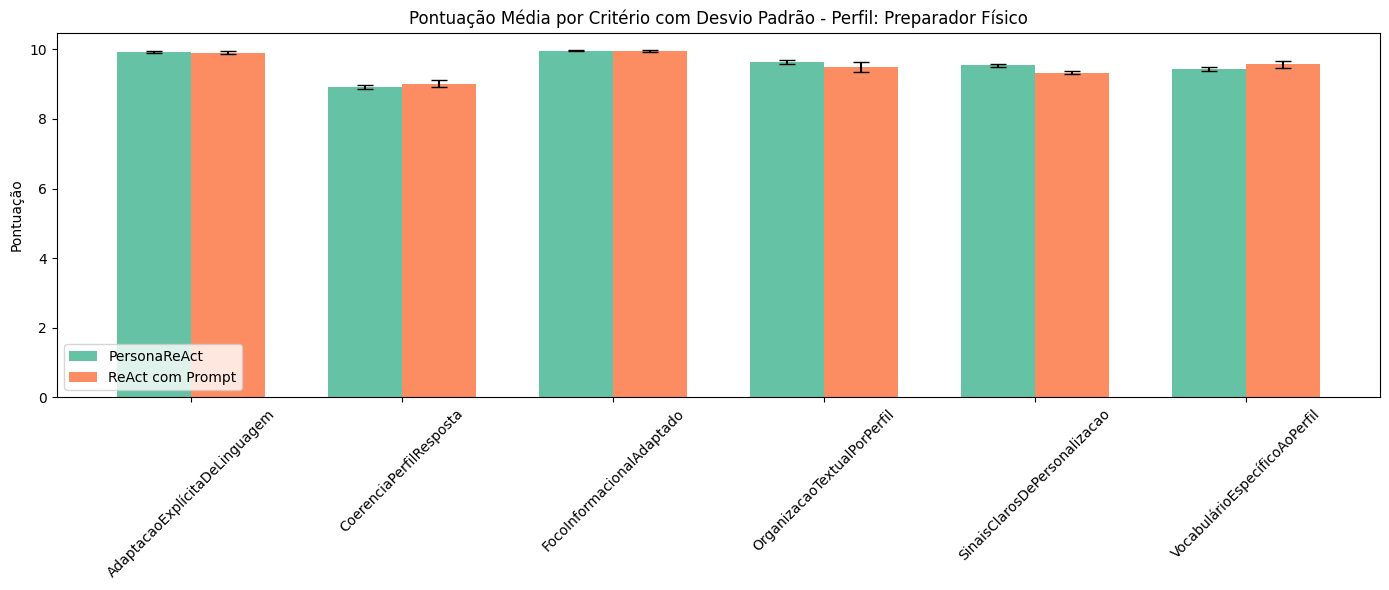

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Preparador Físico")
ax.legend()
plt.tight_layout()
plt.show()

In [81]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.45,9.58,3.661323e-04,✅
1,FocoInformacionalAdaptado,9.97,9.96,2.295540e-04,✅
2,OrganizacaoTextualPorPerfil,9.64,9.50,2.420370e-03,✅
3,AdaptacaoExplícitaDeLinguagem,9.93,9.91,1.236873e-02,✅
4,CoerenciaPerfilResposta,8.92,9.02,3.577849e-03,✅
5,SinaisClarosDePersonalizacao,9.54,9.33,1.653407e-12,✅


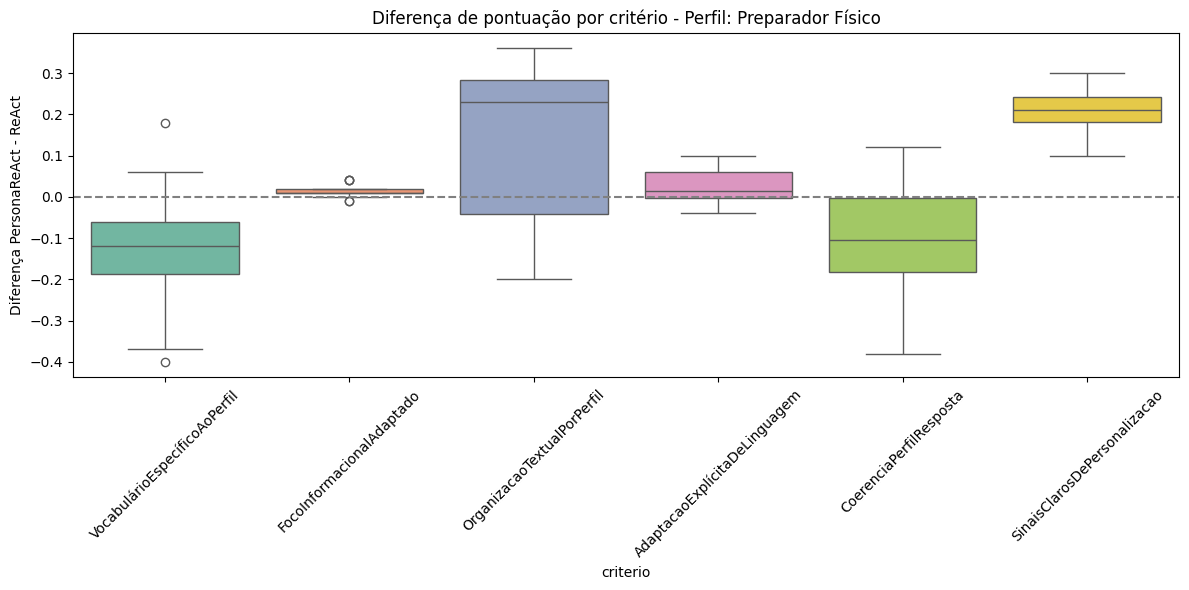

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Preparador Físico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

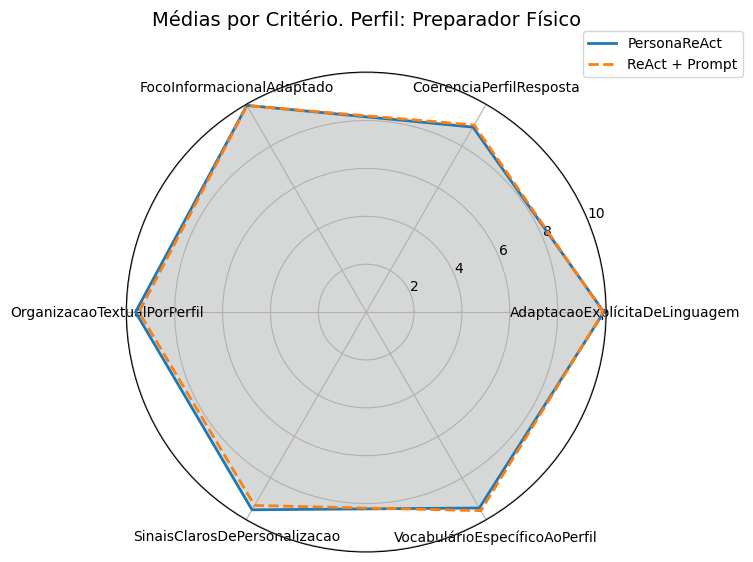

In [83]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Preparador Físico", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Narrador Esportivo

In [84]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_narrador_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.68,8.22,1.46
1,Quais jogadores aceleraram o ritmo do jogo con...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.73,8.18,1.55
2,Quais jogadores aceleraram o ritmo do jogo con...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.44,8.17,1.27
3,Quais jogadores aceleraram o ritmo do jogo con...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.32,8.17,1.15
4,Quais jogadores aceleraram o ritmo do jogo con...,Narrador de Jogo de Futebol,VocabulárioEspecíficoAoPerfil,9.68,8.17,1.51


In [85]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.16,0.09,8.73,0.02
1,CoerenciaPerfilResposta,9.49,0.14,7.84,0.23
2,FocoInformacionalAdaptado,9.57,0.09,7.80,0.12
3,OrganizacaoTextualPorPerfil,9.28,0.11,7.90,0.02
4,SinaisClarosDePersonalizacao,9.03,0.04,8.73,0.19
5,VocabulárioEspecíficoAoPerfil,9.60,0.14,8.20,0.04


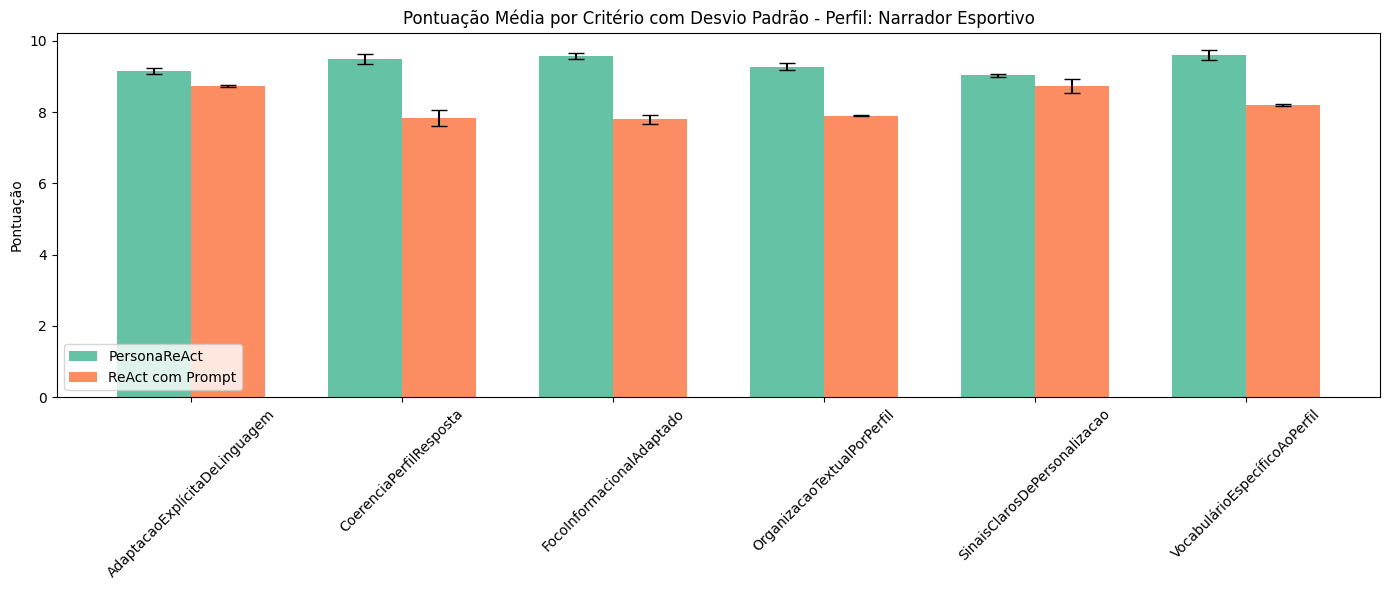

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Narrador Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [87]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.60,8.20,1.662711e-19,✅
1,FocoInformacionalAdaptado,9.57,7.80,5.373316e-22,✅
2,OrganizacaoTextualPorPerfil,9.28,7.90,2.904043e-22,✅
3,AdaptacaoExplícitaDeLinguagem,9.16,8.73,5.178717e-15,✅
4,CoerenciaPerfilResposta,9.49,7.84,1.256199e-16,✅
5,SinaisClarosDePersonalizacao,9.03,8.73,4.416988e-07,✅


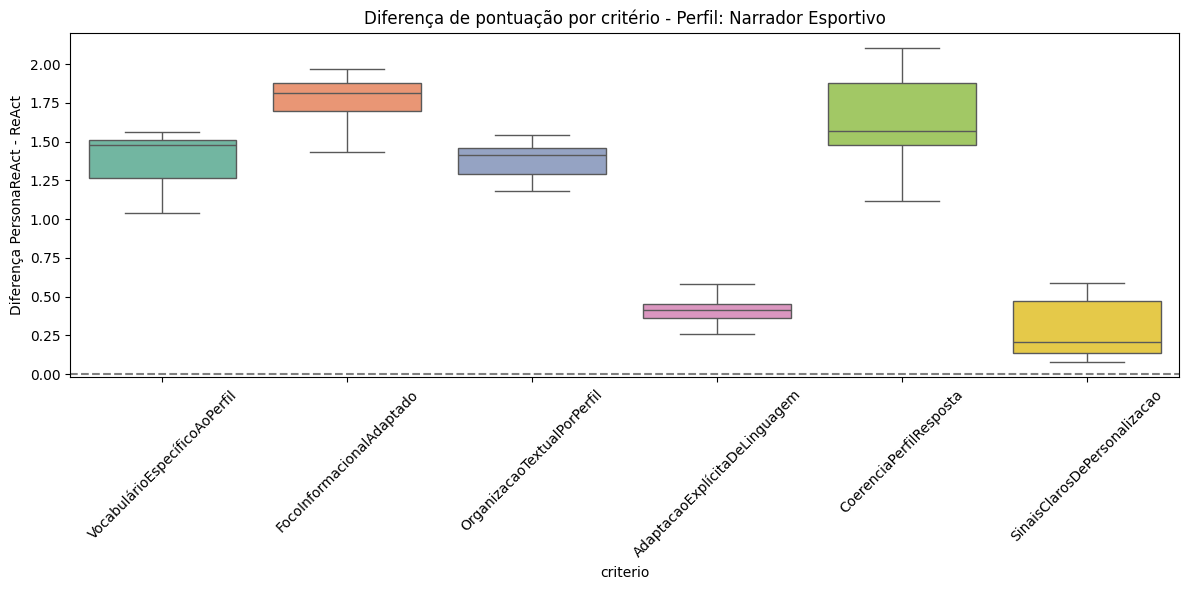

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Narrador Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

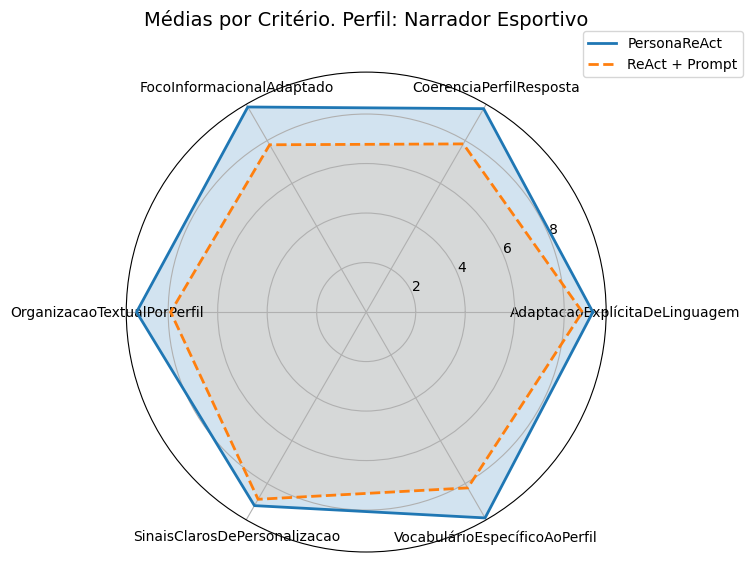

In [89]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Narrador Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Jornalista

In [90]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_jornalista_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.38,9.17,0.21
1,Quais jogadores aceleraram o ritmo do jogo con...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.35,9.12,0.23
2,Quais jogadores aceleraram o ritmo do jogo con...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.41,9.14,0.27
3,Quais jogadores aceleraram o ritmo do jogo con...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.41,9.15,0.26
4,Quais jogadores aceleraram o ritmo do jogo con...,Jornalista Esportivo,VocabulárioEspecíficoAoPerfil,9.41,9.18,0.23


In [91]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.12,0.05,9.10,0.06
1,CoerenciaPerfilResposta,9.75,0.04,9.77,0.05
2,FocoInformacionalAdaptado,9.61,0.03,9.27,0.06
3,OrganizacaoTextualPorPerfil,9.01,0.03,8.95,0.04
4,SinaisClarosDePersonalizacao,9.15,0.04,9.03,0.06
5,VocabulárioEspecíficoAoPerfil,9.36,0.07,9.18,0.05


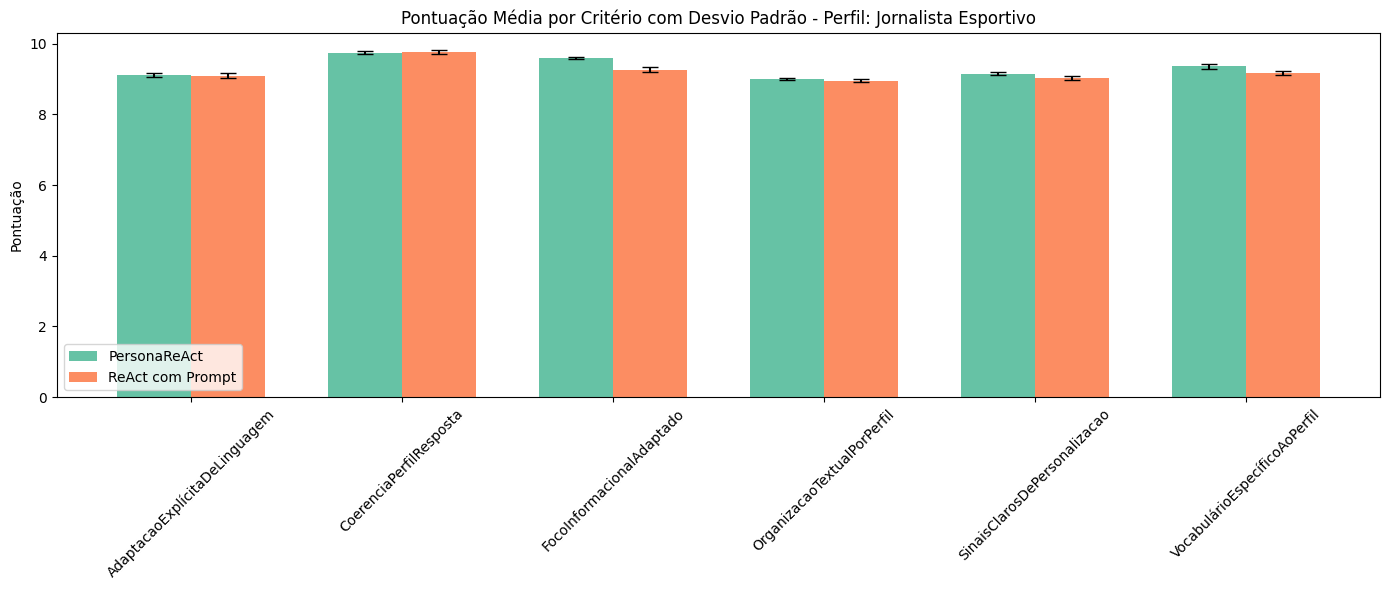

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Jornalista Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [93]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.36,9.18,1.309417e-07,✅
1,FocoInformacionalAdaptado,9.61,9.27,3.132454e-14,✅
2,OrganizacaoTextualPorPerfil,9.01,8.95,1.105286e-05,✅
3,AdaptacaoExplícitaDeLinguagem,9.12,9.10,2.056545e-01,❌
4,CoerenciaPerfilResposta,9.75,9.77,7.533748e-02,❌
5,SinaisClarosDePersonalizacao,9.15,9.03,6.969601e-08,✅


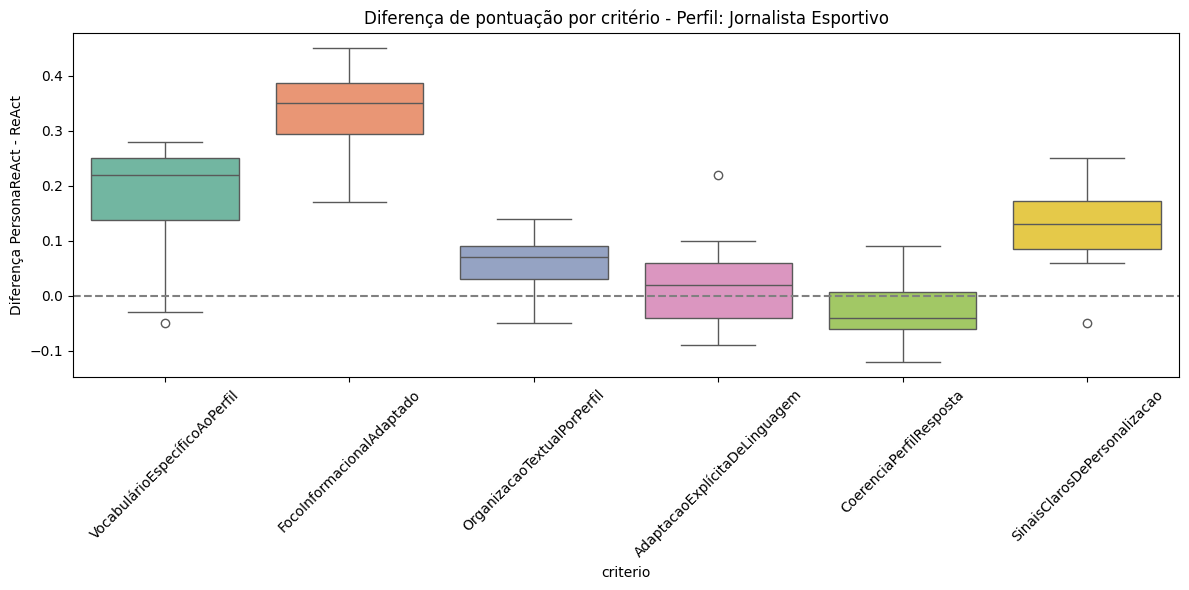

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Jornalista Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

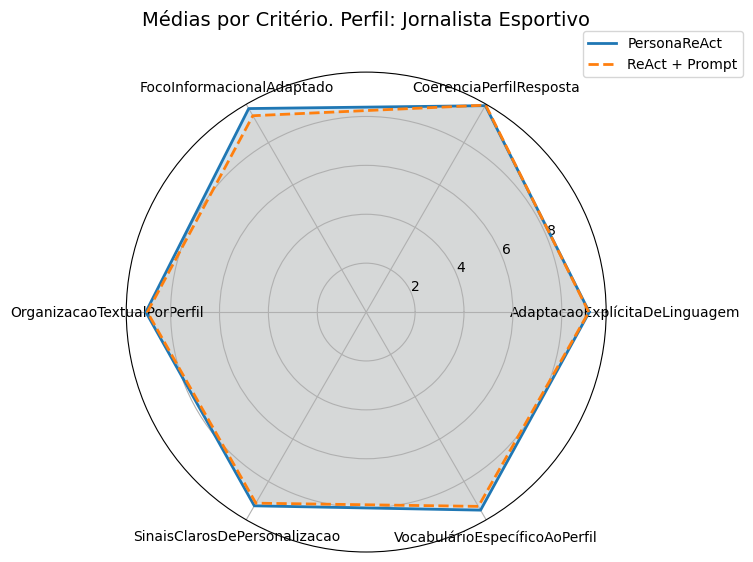

In [95]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Jornalista Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Influenciador Digital

In [96]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_influenciador_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.11,9.23,-0.12
1,Quais jogadores aceleraram o ritmo do jogo con...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.07,9.17,-0.10
2,Quais jogadores aceleraram o ritmo do jogo con...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.18,9.24,-0.06
3,Quais jogadores aceleraram o ritmo do jogo con...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.18,9.25,-0.07
4,Quais jogadores aceleraram o ritmo do jogo con...,Influenciador Digital,VocabulárioEspecíficoAoPerfil,9.22,9.18,0.04


In [97]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,8.74,0.17,9.35,0.07
1,CoerenciaPerfilResposta,9.73,0.06,9.91,0.02
2,FocoInformacionalAdaptado,9.84,0.03,9.69,0.06
3,OrganizacaoTextualPorPerfil,9.35,0.11,9.34,0.10
4,SinaisClarosDePersonalizacao,7.45,0.26,7.61,0.52
5,VocabulárioEspecíficoAoPerfil,9.13,0.05,9.17,0.08


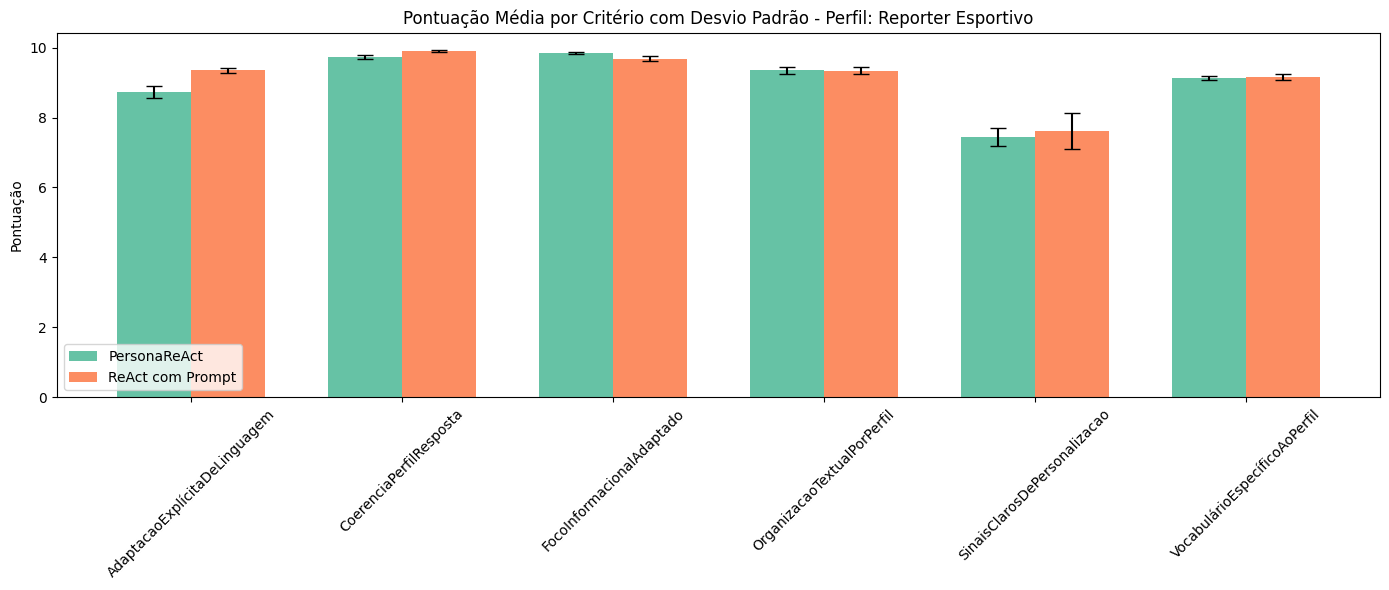

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Reporter Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [99]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.13,9.17,2.442548e-02,✅
1,FocoInformacionalAdaptado,9.84,9.69,1.236376e-08,✅
2,OrganizacaoTextualPorPerfil,9.35,9.34,8.417888e-01,❌
3,AdaptacaoExplícitaDeLinguagem,8.74,9.35,1.656924e-13,✅
4,CoerenciaPerfilResposta,9.73,9.91,3.831994e-11,✅
5,SinaisClarosDePersonalizacao,7.45,7.61,3.016275e-01,❌


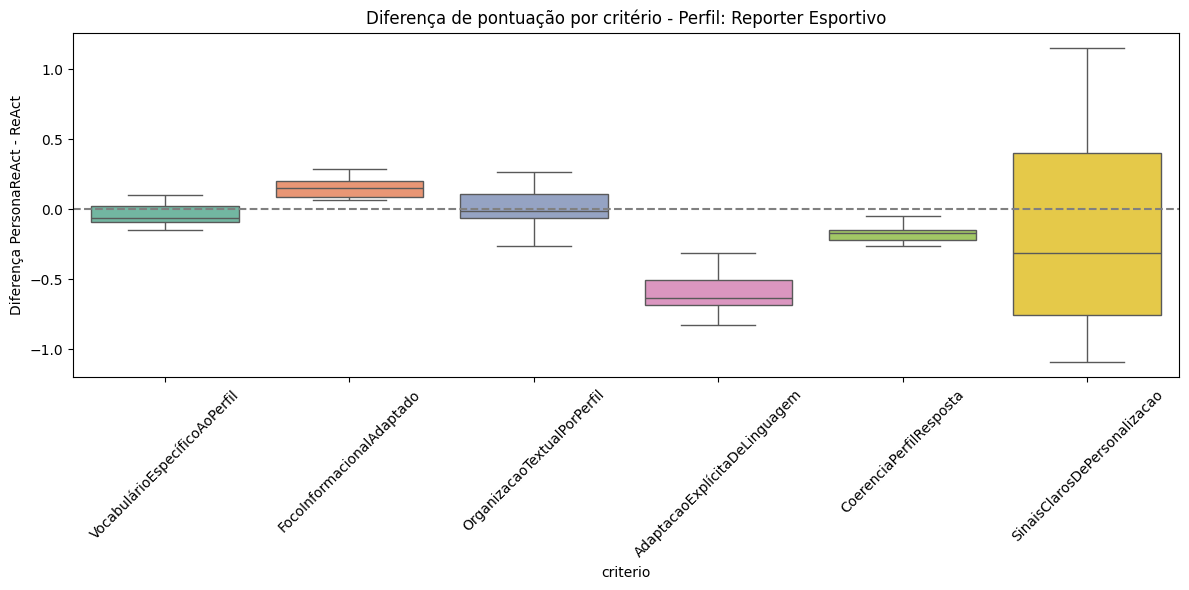

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Reporter Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

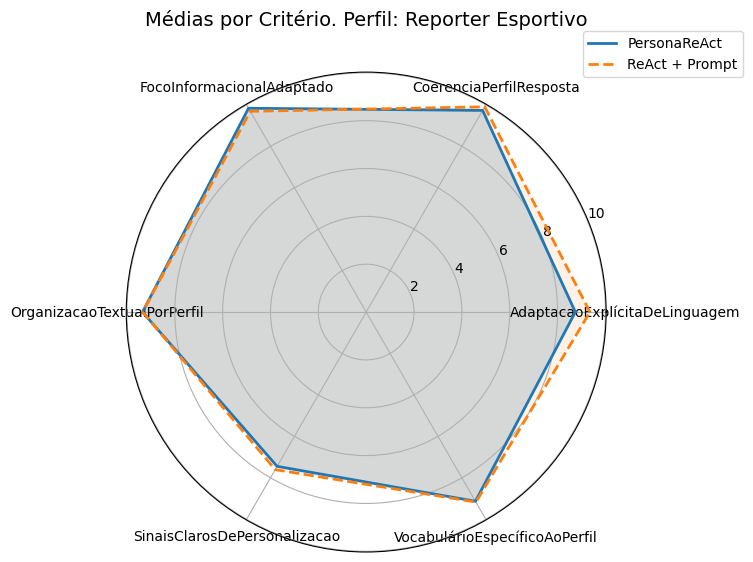

In [101]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Reporter Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# Cômico

In [102]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/experiment_3/evaluation_results_with_repetitions_experiment_3_comico_narrativa_descritiva.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo con...,Cômico,VocabulárioEspecíficoAoPerfil,9.42,9.88,-0.46
1,Quais jogadores aceleraram o ritmo do jogo con...,Cômico,VocabulárioEspecíficoAoPerfil,9.43,9.89,-0.46
2,Quais jogadores aceleraram o ritmo do jogo con...,Cômico,VocabulárioEspecíficoAoPerfil,9.39,9.88,-0.49
3,Quais jogadores aceleraram o ritmo do jogo con...,Cômico,VocabulárioEspecíficoAoPerfil,9.38,9.89,-0.51
4,Quais jogadores aceleraram o ritmo do jogo con...,Cômico,VocabulárioEspecíficoAoPerfil,9.36,9.88,-0.52


In [103]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdaptacaoExplícitaDeLinguagem,9.78,0.03,9.89,0.02
1,CoerenciaPerfilResposta,9.62,0.05,9.75,0.04
2,FocoInformacionalAdaptado,9.32,0.06,9.85,0.05
3,OrganizacaoTextualPorPerfil,9.18,0.03,9.61,0.10
4,SinaisClarosDePersonalizacao,8.98,0.06,9.05,0.05
5,VocabulárioEspecíficoAoPerfil,9.44,0.08,9.88,0.01


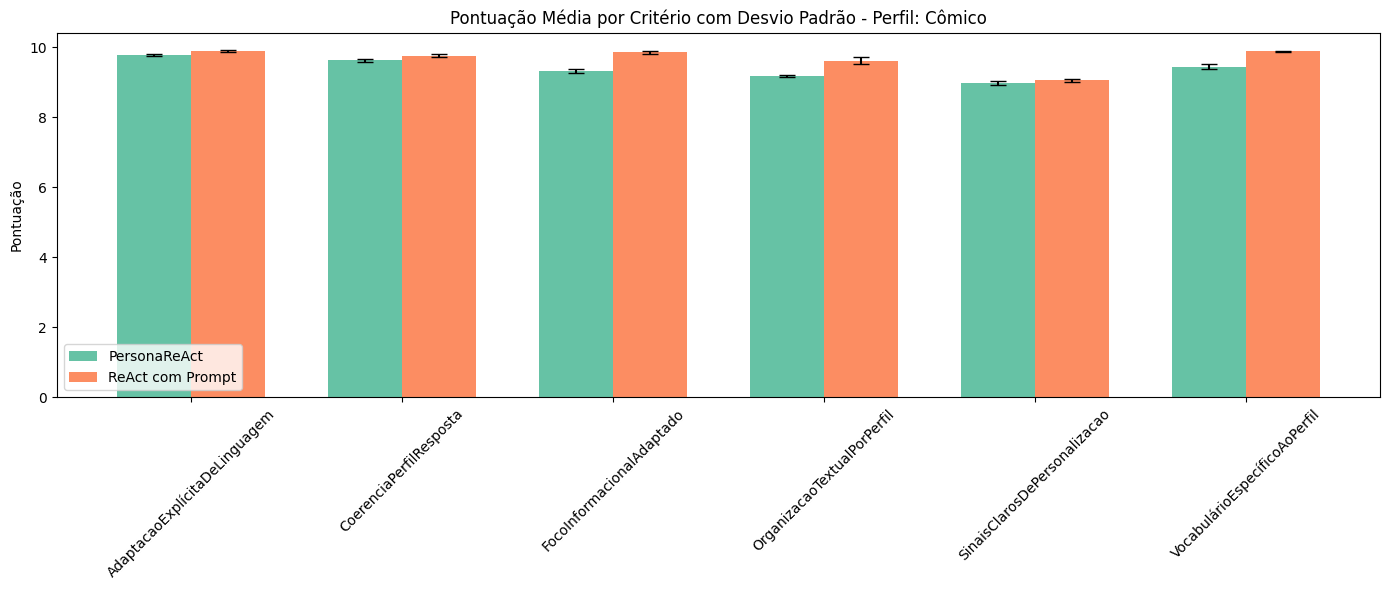

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Cômico")
ax.legend()
plt.tight_layout()
plt.show()

In [105]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,VocabulárioEspecíficoAoPerfil,9.44,9.88,3.845686e-15,✅
1,FocoInformacionalAdaptado,9.32,9.85,1.558164e-17,✅
2,OrganizacaoTextualPorPerfil,9.18,9.61,4.496013e-13,✅
3,AdaptacaoExplícitaDeLinguagem,9.78,9.89,2.467663e-10,✅
4,CoerenciaPerfilResposta,9.63,9.75,1.802193e-08,✅
5,SinaisClarosDePersonalizacao,8.98,9.05,2.743449e-03,✅


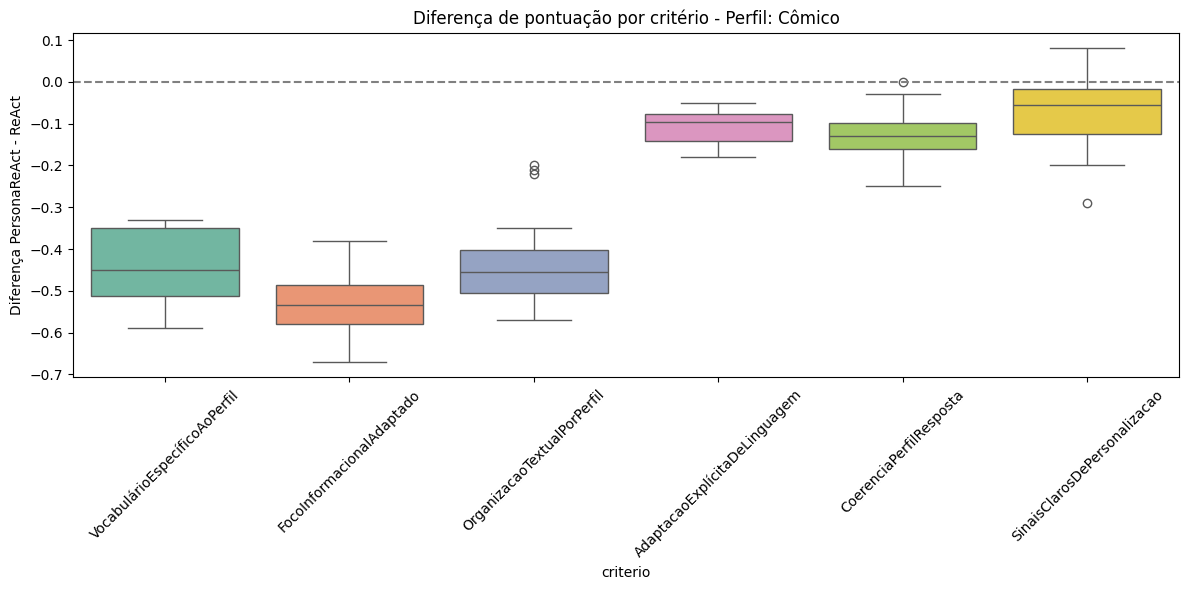

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Cômico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

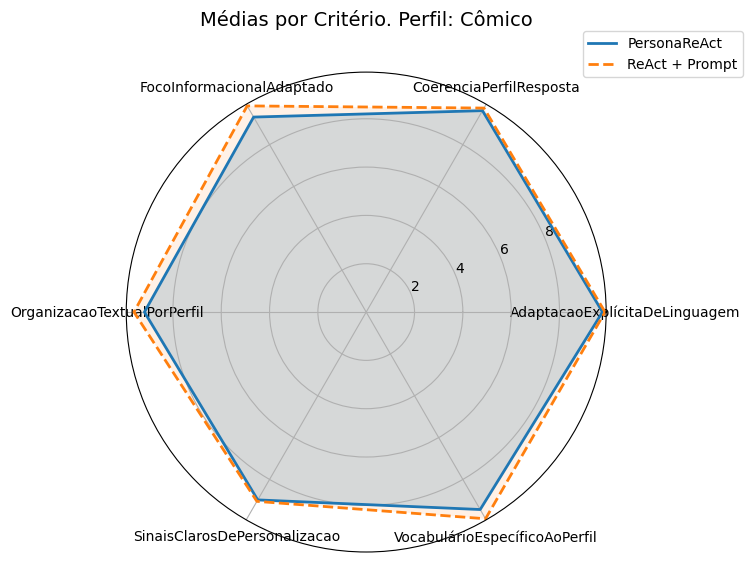

In [107]:
from math import pi
import matplotlib.pyplot as plt

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += [angles[0]]  # Adiciona o primeiro ângulo no final para fechar o círculo

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles[:-1])  # Remove o ângulo duplicado da label
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Cômico", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()